In [31]:
# read all csv files in out folder
# For each file, read the csv file and place the value in the corresponding row
# If the file contains '1exec', then place the value in the first row
# If the file contains '2exec', then place the value in the second row
# If the file contains '4exec', then place the value in the third row

import os
import pandas as pd

# Define the folder path
folder_path = 'out'

# Define the column names
columns = ["Load R1CS", "Load Witness", "Setup", "Prover", "Verifier"]

# Create an empty dataframe with the defined column names
df = pd.DataFrame(columns=columns)

# Loop through all files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        # Read the csv file
        file_path = os.path.join(folder_path, filename)
        temp_df = pd.read_csv(file_path, header=None)

        column = filename.split('-')[0]
        # find the number right before "exec" in the filename
        row = int(filename.split('exec')[0][-1])

        if column == "Load R1CS" or column == "Load Witness":
            value = temp_df.iloc[0,0]
        elif column == "Prover":
            value = temp_df.iloc[0,1] + temp_df.iloc[0,2]
        elif column == "Verifier":
            value = temp_df.iloc[0,1]
        elif column == "Setup":
            value = temp_df.iloc[0,1] + temp_df.iloc[0,2] + temp_df.iloc[0,3]
        # Place the values
        df.loc[row, column] = value

df["Prover Total"] = df["Load R1CS"] + df["Load Witness"] + + df["Setup"] + df["Prover"]
print(df)

   Load R1CS Load Witness      Setup     Prover  Verifier Prover Total
1   4.773427     1.163316  39.761798  21.632774  0.075915    67.331315
2    5.30175     0.582273  27.057316  17.974346  0.092525    50.915685
3   5.505524     3.388578  30.918617  17.183828  0.094259    56.996547
4  10.780802     2.547329  28.350123  19.853725  0.388467    61.531978


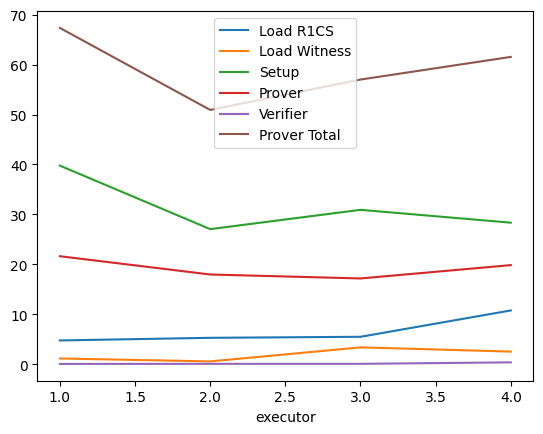

In [32]:
# draw a line chart on df
# x is row number
# y is the value of all columns
import matplotlib.pyplot as plt
df.index.name = 'executor'
# only integer number is allowed in xticks
df.plot.line()
plt.show()